In [ ]:
# K-Means Clustering Implementation
import numpy as np 

class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    
    def fit(self, X):
        # Convert to numpy array
        X = np.array(X)
        n_samples, n_features = X.shape

        # Random seed for reproducibility
        rng = np.random.RandomState(self.random_state)
        
        # 1. Randomly pick initial centroids from data
        random_indices = rng.choice(n_samples, self.n_clusters, replace=False) # replace=False: don't let us pick same indices
        centroids = X[random_indices]

        for i in range(self.max_iter):
            # 2. Assign each point to nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # 3. Compute new centroids as mean of assigned points

            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            if np.linalg.norm(new_centroids - centroids) < self.tol:
                break

            centroids = new_centroids
        self.cluster_centers_ = centroids
        self.labels_ = labels

    
    def predict(self, X):
        X = np.array(X)

        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)       

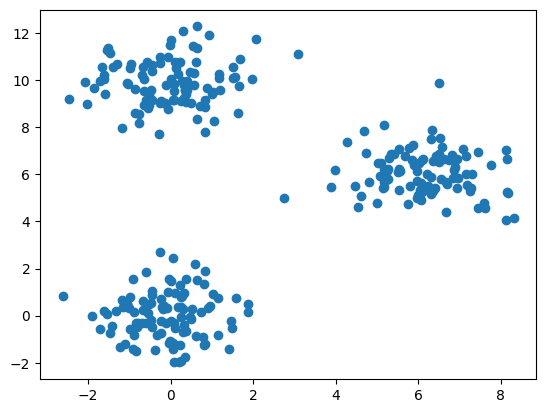

In [4]:
# Testing it with an example
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([0, 0])
X2 = np.random.randn(100, 2) + np.array([6, 6])
X3 = np.random.randn(100, 2) + np.array([0, 10])
X = np.vstack((X1, X2, X3))

plt.scatter(X[:,0], X[:, 1])
plt.show()



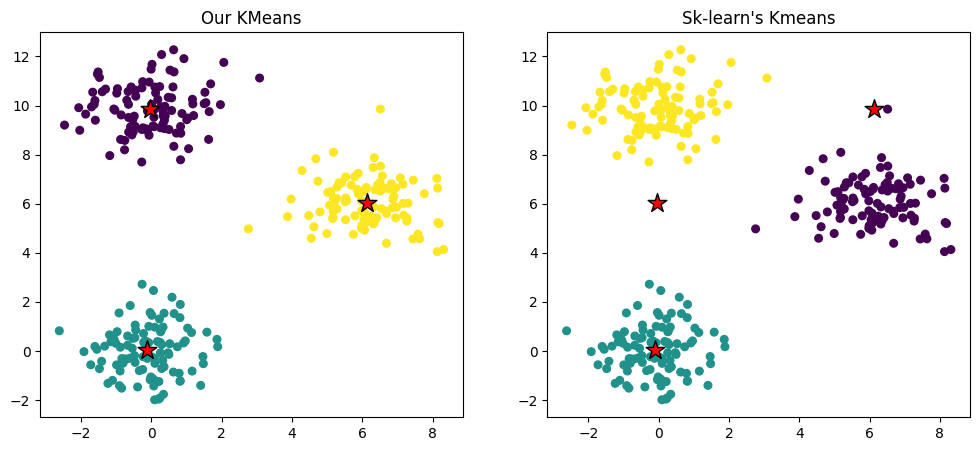

our centroids: 
 [[-0.04503739  9.87372732]
 [-0.11556425  0.03402232]
 [ 6.12824872  6.04348765]]
Sk-learn's centroids: 
 [[ 6.12824872  6.04348765]
 [-0.11556425  0.03402232]
 [-0.04503739  9.87372732]]


In [11]:
# Comparsion with sk-learn
from sklearn.cluster import KMeans as SKKMeans

# Our KMeans
our_kmeans = KMeans(n_clusters=3, random_state=40, max_iter=200)
our_kmeans.fit(X)

sk_kmeans = SKKMeans(n_clusters=3, random_state=40, max_iter=200)
sk_kmeans.fit(X)

# Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Our Kmeans
axes[0].scatter(X[:, 0], X[:, 1], c=our_kmeans.labels_, cmap="viridis", s=30)
axes[0].scatter(our_kmeans.cluster_centers_[:, 0], our_kmeans.cluster_centers_[:,1], c="red", marker="*", s=200, edgecolor="black")
axes[0].set_title("Our KMeans")


# Sk-learn's Kmeans
axes[1].scatter(X[:, 0], X[:, 1], c=sk_kmeans.labels_, cmap="viridis", s=30)
axes[1].scatter(our_kmeans.cluster_centers_[:, 0], sk_kmeans.cluster_centers_[:,1], c="red", marker="*", s=200, edgecolor="black")
axes[1].set_title("Sk-learn's Kmeans")

plt.show()
print("our centroids: \n", our_kmeans.cluster_centers_)
print("Sk-learn's centroids: \n", sk_kmeans.cluster_centers_)